In [1]:
import os
import sys
import rootpath
sys.path.append(rootpath.detect())
%config Completer.use_jedi = False

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [5]:
import wfg
from testsuite.analysis_tools import draw_samples, attainment_sample, get_igd_refpoint_dict
from testsuite.utilities import KDTree_distance
from scipy.spatial import distance_matrix

In [6]:
REF_POINTS = get_igd_refpoint_dict()

In [7]:
func = wfg.WFG4

samples_x, samples_y = draw_samples(func, 4, 5, 1000000)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000000/1000000 [00:05<00:00, 189724.72it/s]


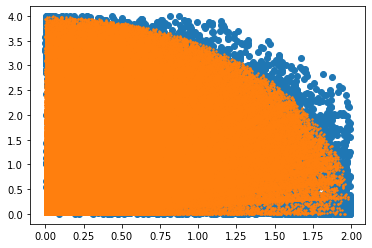

In [8]:
p = np.asarray(REF_POINTS["wfg4_4obj_8dim"])

plt.scatter(*p[:, :2].T)
plt.scatter(*samples_y[:,:2].T, s=2, c="C1")

In [9]:
ans = attainment_sample(samples_y, 800)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 800/800 [13:42<00:00,  1.03s/it]


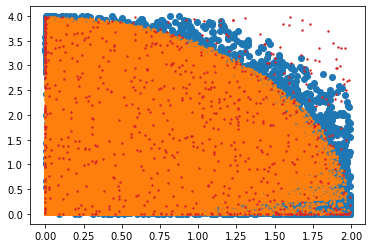

In [45]:
plt.figure()
plt.scatter(*p[:, :2].T)
plt.scatter(*samples_y[:,:2].T, s=2, c="C1")
plt.scatter(*ans[:,:2].T, s=2, c="C3")

In [52]:
synthetic_samples = np.random.multivariate_normal(np.zeros(4), np.eye(4), 1000000)
synthetic_samples.shape

(1000000, 4)

In [51]:
np.std(samples_y, axis=0)

array([0.29647495, 0.7751475 , 1.63710806, 1.9736644 ])

In [5]:
func = wfg.WFG4

p = np.asarray(REF_POINTS["wfg4_3obj_8dim"])

In [6]:
samples_x, samples_y = draw_samples(func, 3, 4, 1000000)

100%|██████████| 1000000/1000000 [00:05<00:00, 185013.97it/s]


In [7]:
attain_s = attainment_sample(samples_y, 800)

100%|██████████| 800/800 [12:39<00:00,  1.05it/s]


In [12]:
sample_attainment_nnds = KDTree_distance(samples_y, attain_s)
sample_attainment_nnds.shape

(800,)

In [14]:
sample_attainment_nnds.max()

1.3191568191972098

In [36]:
%matplotlib qt

In [37]:
fig = plt.figure(figsize=[10, 10])
ax = fig.gca(projection="3d")

# ax.scatter(*p.T, c="C0", alpha=0.1, s=50)
# ax.scatter(*samples_y[::100].T, c="C1", s=5)
ax.scatter(*attain_s[sample_attainment_nnds<.1].T, c="C3", s=5)
# ax.scatter(*attain_s[sample_attainment_nnds>.1].T, c="C2", s=2)

In [57]:
fig = plt.figure()
ax = fig.gca()
aa = ax.hist(sample_attainment_nnds, int(len(sample_attainment_nnds)/10))
ax.axvline(0.1, c="C3")
ax.axvline(ab, c="C3")

In [56]:
ab = aa[1][np.where(aa[0][:-1]-aa[0][1:]<0)[0][0]-1]

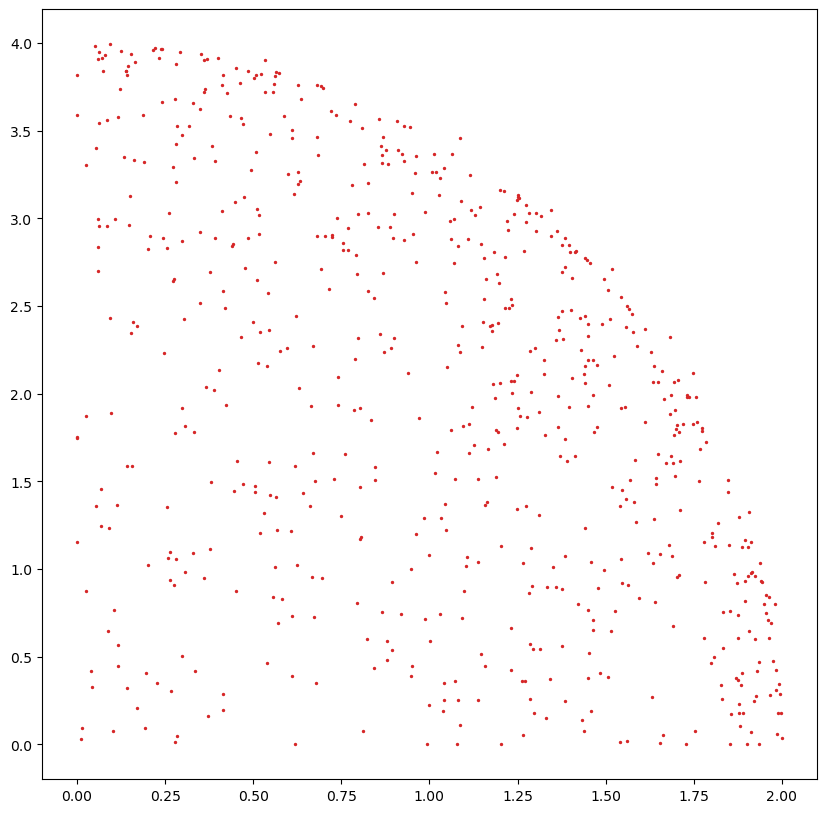

In [58]:
fig = plt.figure(figsize=[10, 10])
ax = fig.gca()

# ax.scatter(*p[:,:2].T, c="C0", alpha=0.3, s=50)
# ax.scatter(*samples_y[:,:2][::100].T, c="C1", s=5)
ax.scatter(*attain_s[sample_attainment_nnds<ab][:,:2].T, c="C3", s=2)
fig

In [60]:
func = wfg.WFG4

p = np.asarray(REF_POINTS["wfg4_4obj_8dim"])

In [61]:
samples_x, samples_y = draw_samples(func, 4, 5, 1000000)

100%|██████████| 1000000/1000000 [00:05<00:00, 181948.05it/s]


In [62]:
attain_s = attainment_sample(samples_y, 800)

  1%|          | 6/800 [00:06<14:58,  1.13s/it]


KeyboardInterrupt: 

In [12]:
sample_attainment_nnds = KDTree_distance(samples_y, attain_s)
sample_attainment_nnds.shape

(800,)